In [17]:
import matplotlib
%matplotlib inline
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/Users/averylouis/Documents/GitHub/rpp-net/rpp-net/data/master_features.csv")
df = df.dropna(subset=['effect_size_original', 'effect_size_replication'])
df['effect_size_diff'] = df['effect_size_replication'] - df['effect_size_original']

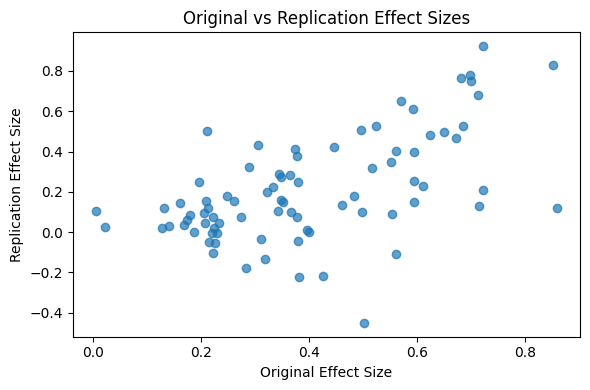

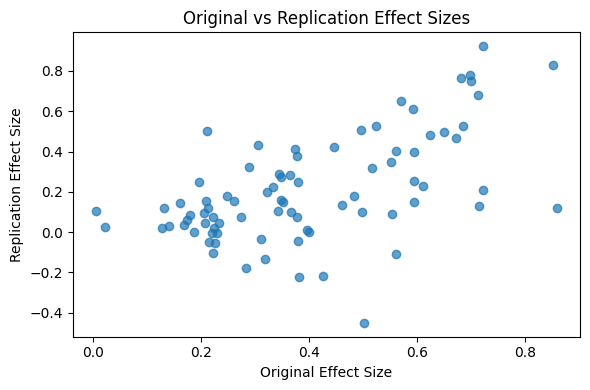

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(df['effect_size_original'], df['effect_size_replication'], alpha=0.7)
plt.xlabel('Original Effect Size')
plt.ylabel('Replication Effect Size') 
plt.title('Original vs Replication Effect Sizes')
plt.tight_layout()
plt.show()


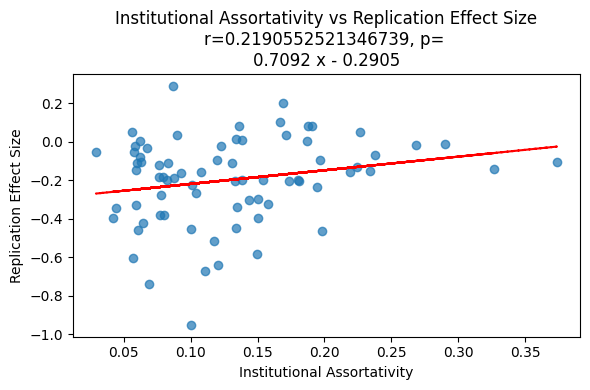

In [22]:
df['effect_size_diff'] = df['effect_size_replication'] - df['effect_size_original']
df_no_anom_gini = df[df['gini'] > 0.9]

# Calculate correlation coefficient and p-value
from scipy.stats import pearsonr
corr, p = pearsonr(df_no_anom_gini['clust_coef'], df_no_anom_gini['effect_size_diff'])

plt.figure(figsize=(6,4))
plt.scatter(df_no_anom_gini['clust_coef'], df_no_anom_gini['effect_size_diff'], alpha=0.7)

# Add line of best fit
z = np.polyfit(df_no_anom_gini['clust_coef'], df_no_anom_gini['effect_size_diff'], 1)
p = np.poly1d(z)
plt.plot(df_no_anom_gini['clust_coef'], p(df_no_anom_gini['clust_coef']), "r--")

plt.xlabel('Institutional Assortativity')
plt.ylabel('Replication Effect Size')
plt.title(f'Institutional Assortativity vs Replication Effect Size\nr={corr}, p={p}')
plt.tight_layout()
plt.show()
